# Crunchbase Project: Exploratory Data Analysis

## Part 2: Investor Analysis

#### In this notebook I will be exploring the data and trying to answer questions that came up in the initial run through of the data during wrangling. 

### The EDA for the project was broken up into three main sections.
1. Investor Analysis
2. Investment Analysis
3. Category Analysis

As there is a wide range of data it took a large amount of exploratory data analysis (EDA) to really get a feel for the entirety of the data and the important features.  We split the EDA into 3 separate notebooks to help with organization.  The notebook provided includes the analysis of the features finally selected.  This being my first big project I did a lot of extra exploration both to be sure that I got everything from the data and to just practice different visualization and analysis tools learned in the course.

## Load Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from datetime import datetime
import glob as glob

In [5]:
#Investment Companies
crunchbase_df = pd.read_csv('data/processed/crunchbase_data.csv').drop(columns=['Unnamed: 0'])

# Investment Round Data
investment_rounds = pd.read_csv('data/interim/investment_rounds.csv', low_memory=False)

In [6]:
crunchbase_df.head(3)

,company_id,company_permalink,funding_round_permalink,year,quarter,tenure_quarters_overall,tenure_quarters_round,short_description,company_category_list,company_category_count,...,investor_ESP,investor_ISR,investor_CHE,investor_JPN,investor_IND,investor_HKG,investor_SGP,investor_CHL,investor_SWE,fund_within_year
0,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,2015,1,0,0,Fame is a live video entertainment platform th...,Media,1.0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,2015,2,1,1,Fame is a live video entertainment platform th...,Media,1.0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,2015,3,2,2,Fame is a live video entertainment platform th...,Media,1.0,...,0,0,0,0,0,0,0,0,0,0.0


# Investors Analysis

### Exploration 1: Do Global Investors Fund Differently?
- ### Types of Rounds (Global vs Local)
- ### Does seed amount differ between local and global investments?

### Exploration 2: Do Experienced Investors Fund Differently?
    

In [125]:
# Column Variables
investor_company_cols = ['funding_round_permalink','funding_round_type','funding_round_code',\
                         'investor_investments_total_count','year','investor_company_same_country',\
                         'raised_amount_usd']
investor_country_cols = list(crunchbase_df.iloc[:,-31:].columns)

# Summarized Investor, Company & Country Data
investor_company_countries = crunchbase_df[investor_company_cols + investor_country_cols].drop_duplicates(subset=['funding_round_permalink','investor_company_same_country'])
investor_company_countries = investor_company_countries[investor_company_countries.raised_amount_usd <= investor_company_countries.raised_amount_usd.quantile(0.95)]
investor_company_countries.head()

,funding_round_permalink,funding_round_type,funding_round_code,investor_investments_total_count,year,investor_company_same_country,raised_amount_usd,company_USA,company_GBR,company_CAN,...,investor_ESP,investor_ISR,investor_CHE,investor_JPN,investor_IND,investor_HKG,investor_SGP,investor_CHL,investor_SWE,fund_within_year
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,0.0,2015,0,1.000000e+07,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,0.0,2014,0,7.000000e+05,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
7,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,0.0,2014,0,6.127841e+06,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
12,/funding-round/650b8f704416801069bb178a1418776b,venture,B,0.0,2014,0,3.406878e+06,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
20,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,16.0,2008,1,2.000000e+06,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


# Exploration 1: Do Global Investors Fund Differently? 

### I am defining Global Investments as investments made by investors in a different country and Local Investments as investments made by investors in the same country.

In [126]:
# Separate Global investor and Local Investments
investor_global_country = investor_company_countries[(investor_company_countries.investor_company_same_country == 0)]
investor_local_country = investor_company_countries[(investor_company_countries.investor_company_same_country == 1)]

# Only get years before 2013
global_investments_since_2013 = investor_global_country[investor_global_country.year <= 2013]
local_investments_since_2013 = investor_local_country[investor_local_country.year <= 2013]

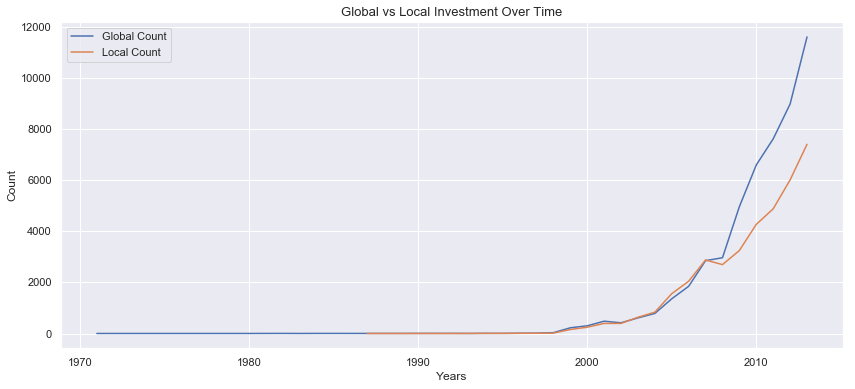

In [130]:
_ = plt.figure(figsize=(14,6))
_ = plt.plot(global_investments_since_2013.groupby('year')[['funding_round_permalink']].count())
_ = plt.plot(local_investments_since_2013.groupby('year')[['funding_round_permalink']].count())
_ = plt.title('Global vs Local Investment Over Time', size=13)
_ = plt.xlabel('Years')
_ = plt.ylabel('Count')
_ = plt.legend(['Global Count','Local Count'])
_ = plt.savefig('figures/eda/investors/globalvslocal_over_time.png')

## Top Outward Investing Countries

In [176]:
# Get Round Where Investor and Company are not in same country
global_investors = investment_rounds[investment_rounds['company_country_code'] != investment_rounds['investor_country_code']]

# Count by Country Code
top_investing_countries = pd.DataFrame(global_investors['investor_country_code'].value_counts().head(15)).reset_index()
top_investing_countries.columns = ['investor_country','investment_count']

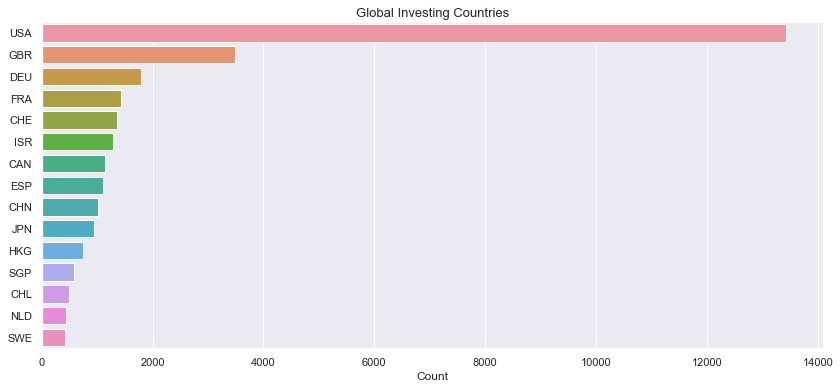

In [195]:
#Plot
_ = plt.figure(figsize=(14,6))
_ = sns.barplot(x='investment_count', y='investor_country', data=top_investing_countries)
_ = plt.title('Global Investing Countries', size=13)
_ = plt.xlabel('Count')
_ = plt.ylabel('')

## a) Do they focus on different rounds? Maybe later stage ventures?

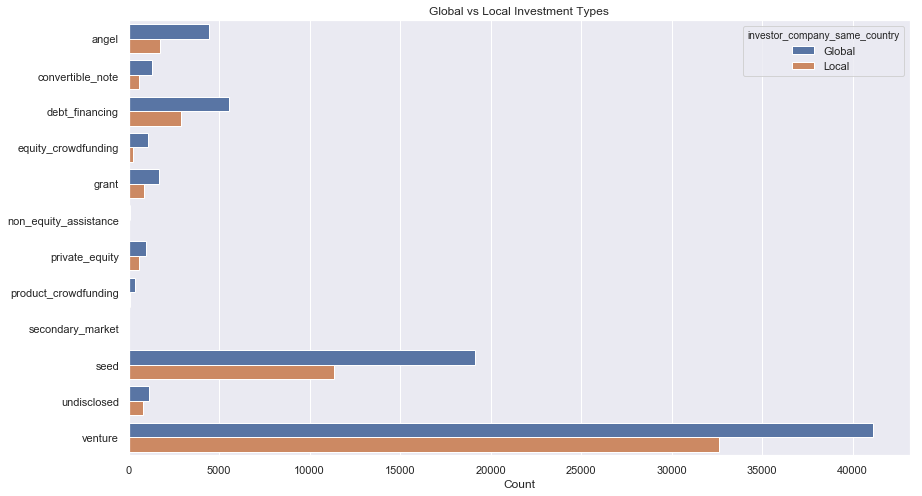

In [131]:
# Count by Type
investment_types_globalvslocal = investor_company_countries.groupby(['investor_company_same_country','funding_round_type'])[['funding_round_permalink']].count().reset_index()
investment_types_globalvslocal.columns = ['investor_company_same_country','funding_round_type','count']

# Binary to Strings
investment_types_globalvslocal['investor_company_same_country'] = investment_types_globalvslocal['investor_company_same_country'].replace(0,'Global')
investment_types_globalvslocal['investor_company_same_country'] = investment_types_globalvslocal['investor_company_same_country'].replace(1,'Local')

#Plot
_ = plt.figure(figsize=(14,8))
_ = sns.barplot(x='count', y='funding_round_type', data=investment_types_globalvslocal, hue='investor_company_same_country')
_ = plt.title('Global vs Local Investment Types')
_ = plt.xlabel('Count')
_ = plt.ylabel('')
_ = plt.savefig('figures/eda/investors/globalvslocal_investment_types.png')

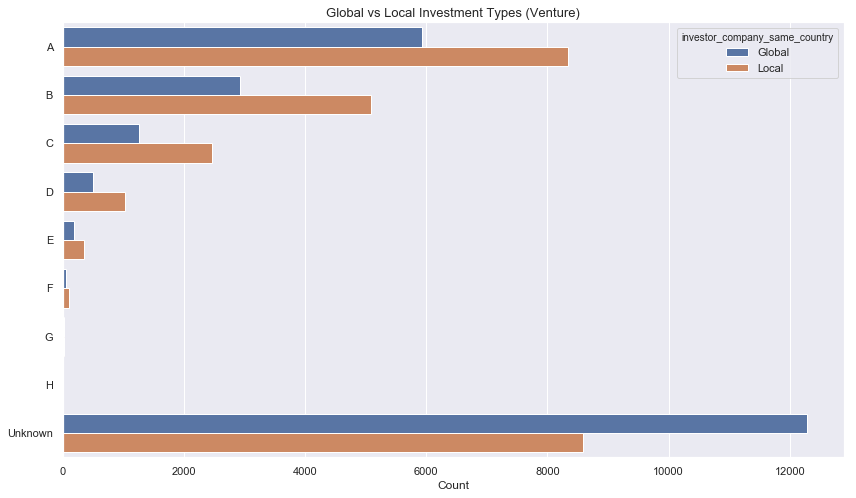

In [132]:
# Count by Type
investment_code_globalvslocal = investor_company_countries.drop_duplicates(subset=['funding_round_permalink']).groupby(['investor_company_same_country','funding_round_code'])[['funding_round_permalink']].count().reset_index()
investment_code_globalvslocal.columns = ['investor_company_same_country','funding_round_code','count']

# Binary to Strings
investment_code_globalvslocal['investor_company_same_country'] = investment_code_globalvslocal['investor_company_same_country'].replace(0,'Global')
investment_code_globalvslocal['investor_company_same_country'] = investment_code_globalvslocal['investor_company_same_country'].replace(1,'Local')

#Plot
_ = plt.figure(figsize=(14,8))
_ = sns.barplot(x='count', y='funding_round_code', data=investment_code_globalvslocal, hue='investor_company_same_country')
_ = plt.title('Global vs Local Investment Types (Venture)', size=13)
_ = plt.xlabel('Count')
_ = plt.ylabel('')
_ = plt.savefig('figures/eda/investors/globalvslocal_venture.png')

In [133]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

## b) Does Raised Amount Differ between Local and Global Investments?

Hypothesis<br>
<strong>Null Hypothesis</strong>: Local and global investments have no difference in seed amount.<br>
<strong>Alternative Hypothesis</strong>: Global investments have a higher mean readmission rates than local investments.

In [134]:
seed_investments = investor_company_countries[investor_company_countries.funding_round_type == 'seed']

In [135]:
global_seed = seed_investments[seed_investments.investor_company_same_country == 0]
local_seed = seed_investments[seed_investments.investor_company_same_country == 1]

## Bootstrap Confidence Intervals:  Global vs Local Funding Amounts

In [136]:
#
global_bs_reps = draw_bs_reps(global_seed['raised_amount_usd'].dropna(), np.mean, size=1000)
local_bs_reps = draw_bs_reps(local_seed['raised_amount_usd'].dropna(), np.mean, size=1000)

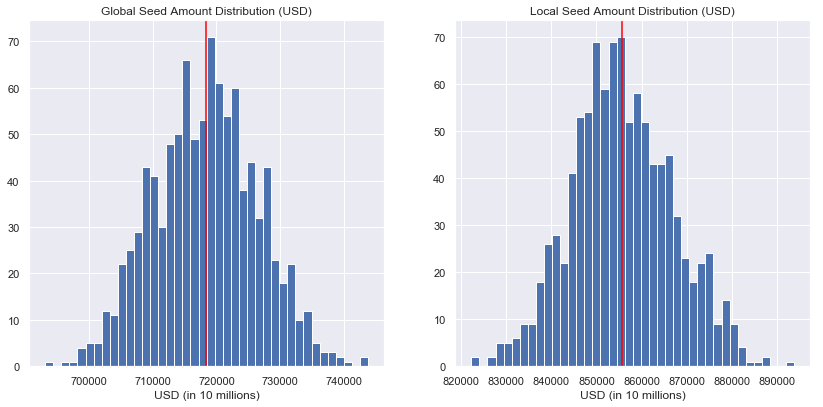

In [137]:
#Plot histogram of bootstrap Excess Readmission Ratio data based on size
_ = plt.figure(figsize=(14,14))
_ = plt.subplot(2,2,1)
_ = plt.hist(global_bs_reps, bins=40)
_ = plt.axvline(np.mean(global_bs_reps), color='red')
_ = plt.title('Global Seed Amount Distribution (USD)')
_ = plt.xlabel('USD (in 10 millions)')

_ = plt.subplot(2,2,2)
_ = plt.hist(local_bs_reps, bins=40)
_ = plt.axvline(np.mean(local_bs_reps), color='red')
_ = plt.title('Local Seed Amount Distribution (USD)')
_ = plt.xlabel('USD (in 10 millions)')

_ = plt.savefig('figures/eda/investors/globalvslocal_seed_amount_distribution.png')

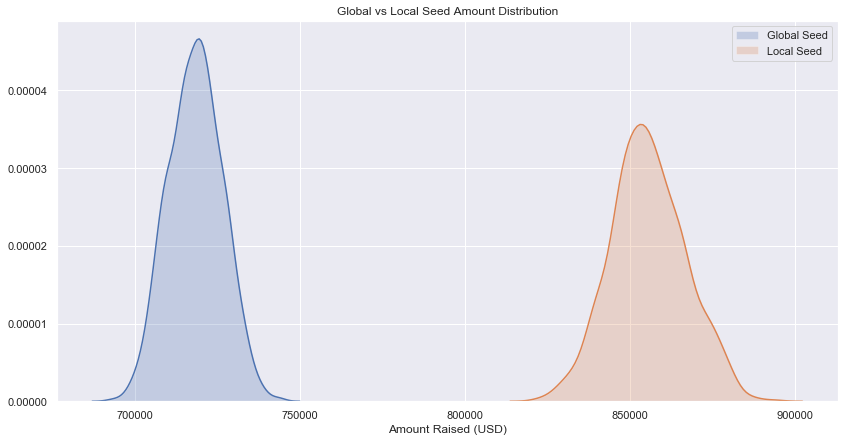

In [138]:
#Plot KDE plot of bootstrap Excess Readmission Ratio based on size
_ = plt.figure(figsize=(14,7))
_ = sns.kdeplot(global_bs_reps, shade=True)
_ = sns.kdeplot(local_bs_reps, shade=True)
_ = plt.title('Global vs Local Seed Amount Distribution')
_ = plt.xlabel('Amount Raised (USD)')
_ = plt.legend(('Global Seed', 'Local Seed'))
_ = plt.savefig('figures/eda/investors/globalvslocal_seed_amount_kde.png')

### 95% Confidence Intervals

In [16]:
print('Global Seed Amount: 95% Confidence Interval is ' + str(np.percentile(global_bs_reps, [2.5,97.5])))
print('Local Seed Amount: 95% Confidence Interval is ' +  str(np.percentile(local_bs_reps, [2.5,97.5])))

Global Seed Amount: 95% Confidence Interval is [702070.09990614 733681.05963689]
Local Seed Amount: 95% Confidence Interval is [833565.71529026 879758.31206951]


### Permutation Function

In [140]:
def diff_of_means(data1, data2):
    return np.mean(data1) - np.mean(data2)

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data1, data2, func, size=1):
    
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data1, data2)
        
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates

## Hypothesis Testing: Permutation Testing
<strong>Null Hypothesis</strong>: Global and Local investments have no difference in raised amounts.<br>
<strong>Alternative Hypothesis</strong>: Global and Local investments have a difference in raised amount.

In [141]:
#Calculate the true difference of means of small and large hospitals
true_difference = np.mean(global_seed['raised_amount_usd']) - np.mean(local_seed['raised_amount_usd'])
print('True Difference of Means: ', true_difference)

('True Difference of Means: ', -137190.00354535785)


In [142]:
#Get Difference of Means of Permutation Replicates
diff_perm_reps = draw_perm_reps(global_seed['raised_amount_usd'].dropna(), local_seed['raised_amount_usd'].dropna(), diff_of_means, 5000)

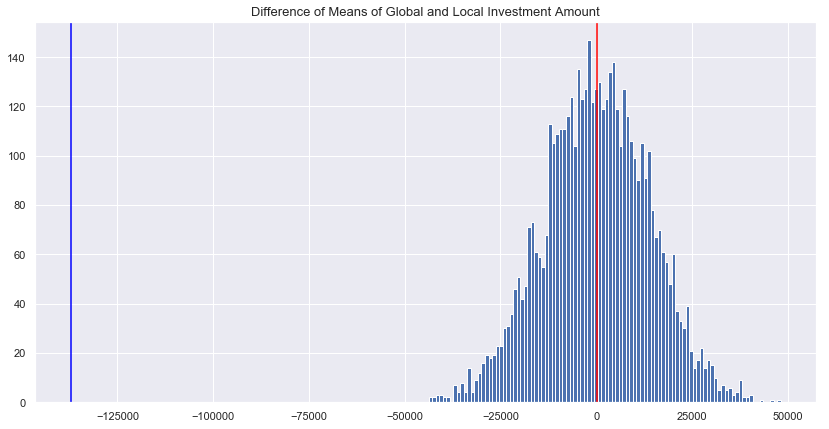

In [143]:
_ = plt.figure(figsize=(14,7))
_ = plt.hist(diff_perm_reps, bins=100)
_ = plt.title('Difference of Means of Global and Local Investment Amount', size=13)
_ = plt.axvline(np.mean(diff_perm_reps), color='red')
_ = plt.axvline(true_difference, color='blue')
_ = plt.savefig('figures/eda/investors/globalvslocal_bootstrap_diffs.png')

### Mean, Standard Deviation, & Confidence Intervals of Difference of Means

In [144]:
print('Mean: ' + str(np.mean(diff_perm_reps)))
print('STD: ' + str(np.std(diff_perm_reps)))
print('99% Confidence Interval: ' + str(np.percentile(diff_perm_reps, [0.5,99.5])))

Mean: 96.02091141281707
STD: 13763.590196882717
99% Confidence Interval: [-35151.75045108  35489.09872644]


### Z-Score & P-Value

In [145]:
print('Z-Score: ' + str((true_difference - np.mean(diff_perm_reps)) / np.std(diff_perm_reps)))
print('P-Value: ' + str( np.sum(diff_perm_reps >= true_difference) / len(diff_perm_reps)))

Z-Score: -9.97457948783336
P-Value: 1


### Conclusion

<strong>The P-Value is less than alpha = 0.01</strong> which means there is almost no probability that the difference in means was due to chance and <strong>we can reject the null hypothesis</strong> and conclude <strong>there IS a statistically significant difference in the Seed Funding Amount by Global and Local Investments</strong>.

# Exploration 2: Do Investors Fund Differently?

## a) Investor Count vs Average Investment

In [146]:
# Count Investments by Investors to get Number of Investments by Investors
investor_counts = investment_rounds.groupby('investor_permalink')[['company_permalink']].count().reset_index()
investor_counts.columns = ['investor_permalink','count']

# Average Amount Raised by Investor to get Average Investments by Investors
investor_fund_avg = investment_rounds.groupby('investor_permalink')[['raised_amount_usd']].mean().reset_index()
investor_fund_avg.columns = ['investor_permalink','average']

# Merge Investor Count and Average Data
investor_count_vs_average_investment = investor_counts.merge(investor_fund_avg)

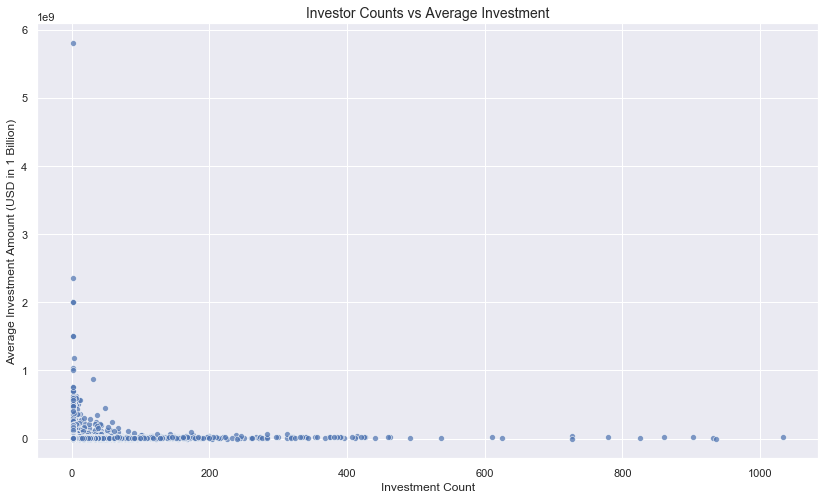

In [216]:
# Plot Investment Count and Average Investment
_ = plt.figure(figsize=(14,8))
_ = sns.scatterplot(x='count', y='average', data=investor_count_vs_average_investment, alpha=0.7, marker='o')
_ = plt.title('Investor Counts vs Average Investment', size=14)
_ = plt.xlabel('Investment Count')
_ = plt.ylabel('Average Investment Amount (USD in 1 Billion)')
_ = plt.savefig('figures/eda/investors/investor_count_vs_average.png')

In [203]:
average_95_quantile = investor_count_vs_average_investment['average'].quantile(0.95)
count_95_quantile = investor_count_vs_average_investment['count'].quantile(0.99)

investor_cnt_avg_investment_no_outliers = investor_count_vs_average_investment[(investor_count_vs_average_investment['average'] < average_95_quantile) & (investor_count_vs_average_investment['count'] < count_95_quantile)]

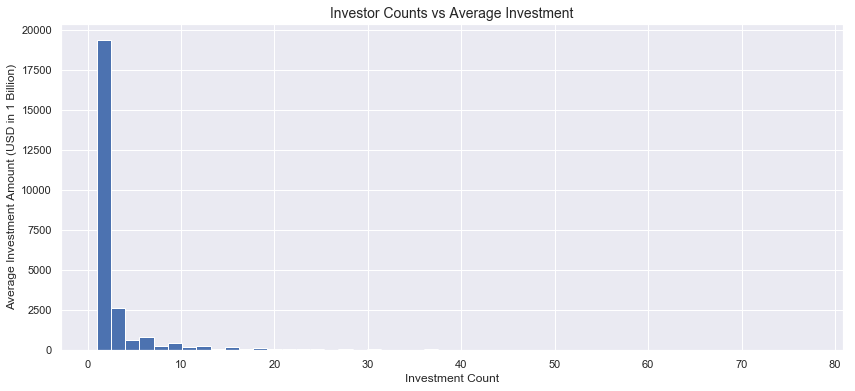

In [211]:
_ = plt.figure(figsize=(14,6))
_ = plt.hist(investor_cnt_avg_investment_no_outliers['count'], bins=50)
_ = plt.title('Investor Counts vs Average Investment', size=14)
_ = plt.xlabel('Investment Count')
_ = plt.ylabel('Average Investment Amount (USD in 1 Billion)')

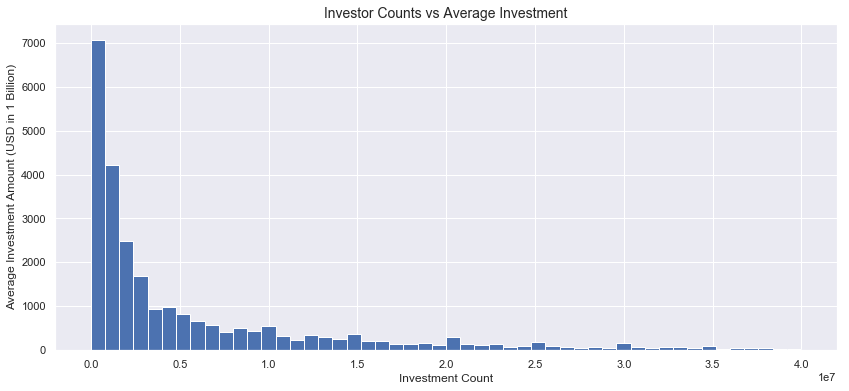

In [212]:
_ = plt.figure(figsize=(14,6))
_ = plt.hist(investor_cnt_avg_investment_no_outliers['average'], bins=50)
_ = plt.title('Investor Counts vs Average Investment', size=14)
_ = plt.xlabel('Investment Count')
_ = plt.ylabel('Average Investment Amount (USD in 1 Billion)')

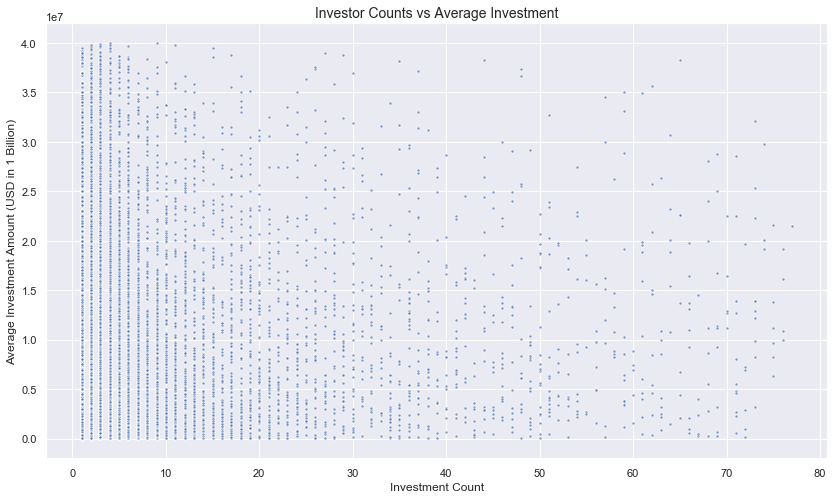

In [215]:
_ = plt.figure(figsize=(14,8))
_ = sns.scatterplot(x='count', y='average', data=investor_cnt_avg_investment_no_outliers, alpha=0.7, marker='.')
_ = plt.title('Investor Counts vs Average Investment', size=14)
_ = plt.xlabel('Investment Count')
_ = plt.ylabel('Average Investment Amount (USD in 1 Billion)')
_ = plt.savefig('figures/eda/investors/investor_count_vs_average_no_outliers.png')

### Observations:
- <strong>Points tend to follow along the X and Y axis.</strong>
- Investors tend to invest <strong>Many Small Investments</strong> OR <strong>Fewer Larger Investments.</strong>

## Questions:
- Do Investors <strong>Either Invest Many Small Investments OR Fewer Large Investments</strong>?
- <strong>Do Investors Tend To Focus on Different Round Types?</strong>

## Q1: Do Investors Either Invest Many Small Investments OR Fewer Large Investments?

### Hypothesis
<strong>Null Hypothesis</strong>: There is NO Difference in Investment Amount Between Investors who Invest in Many vs Fewer Investments.<br>
<strong>Alternative Hypothesis</strong>: There IS a Difference in Investment Amount Between Investors who Invest in Many vs Fewer Investments.

In [148]:
# We Split this between below 25% Investment Count and Above 75% Investment Count
many_investments = investor_count_vs_average_investment[investor_count_vs_average_investment['count'] <= investor_count_vs_average_investment['count'].quantile(0.25)]
fewer_investments = investor_count_vs_average_investment[investor_count_vs_average_investment['count'] > investor_count_vs_average_investment['count'].quantile(0.75)]

# Bootstrap
many_bs_reps = draw_bs_reps(many_investments['average'].dropna(), np.mean, size=1000)
fewer_bs_reps = draw_bs_reps(fewer_investments['average'].dropna(), np.mean, size=1000)

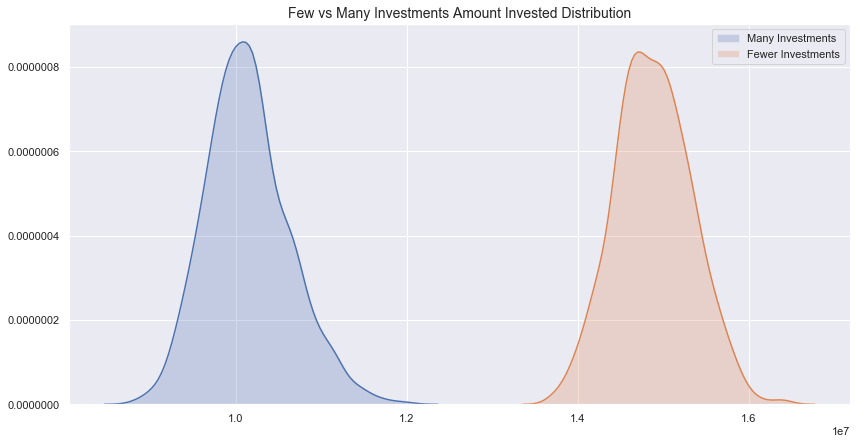

In [150]:
# Plot KDE plot of bootstrap Excess Readmission Ratio based on size
_ = plt.figure(figsize=(14,7))    
_ = sns.kdeplot(many_bs_reps, shade=True)
_ = sns.kdeplot(fewer_bs_reps, shade=True)
_ = plt.title('Few vs Many Investments Amount Invested Distribution', size=14)
_ = plt.xlabel('')
_ = plt.legend(['Many Investments','Fewer Investments'])
_ = plt.savefig('figures/eda/investors/investment_few_vs_many.png')

### Observations
- <strong>Fewer Investments Does Tend To Mean Larger Investments</strong>
    - Although <strong>this test only shows for the division with below 25% and above 75%</strong>, many values were tested in place of the quantile division and this <strong>held true for every tested division</strong> with the main variability being the height of the kdeplot.

### 95% Confidence Intervals

In [151]:
print('Investors with Many Investments: 95% Confidence Interval is ' + str(np.percentile(many_bs_reps, [2.5,97.5])))
print('Investors with Fewer Investments: 95% Confidence Interval is ' +  str(np.percentile(fewer_bs_reps, [2.5,97.5])))

Investors with Many Investments: 95% Confidence Interval is [ 9290345.62261628 11188862.87318258]
Investors with Fewer Investments: 95% Confidence Interval is [14023771.7234258  15766790.01981005]


## Hypothesis Testing: Permutation Testing
<strong>Null Hypothesis</strong>: Global and Local investments have no difference in raised amounts.<br>
<strong>Alternative Hypothesis</strong>: Global and Local investments have a difference in raised amount.

In [152]:
#Calculate the true difference of means of small and large hospitals
true_difference_amount = np.mean(many_investments['average']) - np.mean(fewer_investments['average'])
print('True Difference of Means: ', true_difference_amount)

('True Difference of Means: ', -4763446.714944221)


In [153]:
#Get Difference of Means of Permutation Replicates
diff_perm_reps_amount = draw_perm_reps(many_investments['average'].dropna(), fewer_investments['average'].dropna(), diff_of_means, 5000)

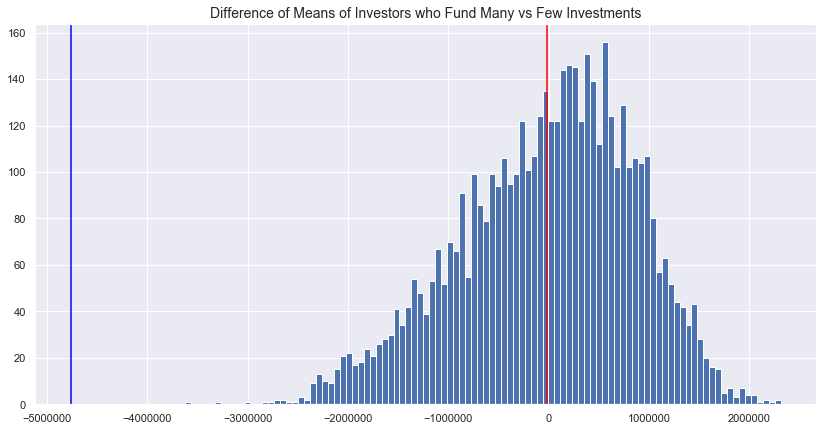

In [154]:
_ = plt.figure(figsize=(14,7))
_ = plt.hist(diff_perm_reps_amount, bins=100)
_ = plt.title('Difference of Means of Investors who Fund Many vs Few Investments', size=14)
_ = plt.axvline(np.mean(diff_perm_reps_amount), color='red')
_ = plt.axvline(true_difference_amount, color='blue')
_ = plt.savefig('figures/eda/investors/few_vs_many_diff_of_mean_investment.png')

### Mean, Standard Deviation, & Confidence Intervals of Difference of Means

In [155]:
print('Mean: ' + str(np.mean(diff_perm_reps_amount)))
print('STD: ' + str(np.std(diff_perm_reps_amount)))
print('99% Confidence Interval: ' + str(np.percentile(diff_perm_reps_amount, [0.5,99.5])))

Mean: -20715.762526519924
STD: 876516.8927341646
99% Confidence Interval: [-2314332.17267572  1808859.33782348]


### Z-Score

In [156]:
print('z-score: ' + str((true_difference_amount - np.mean(diff_perm_reps_amount)) / np.std(diff_perm_reps_amount)))

z-score: -5.410883682599037


### P-Value

In [157]:
print('P-Value: ' + str( np.sum(diff_perm_reps_amount >= true_difference_amount) / len(diff_perm_reps_amount)))

P-Value: 1


### Conclusion

<strong>The P-Value is GREATER than alpha = 0.01</strong> we can accept the null hypothesis</strong> and conclude <strong>there is NO statistically significant difference in the Funding Amount Depending on Investment Quantity</strong>.

##  Q2. Do Investors Tend To Focus on Different Round Types?

In [97]:
# Count Investments by Round & Venture Types
investor_round_counts = investment_rounds.groupby(['investor_permalink','funding_round_code'])[['company_permalink']].count().reset_index()
investor_round_counts.columns = ['investor_permalink','round_type','investment_count']
investor_round_type_counts = investment_rounds.groupby(['investor_permalink','funding_round_type'])[['company_permalink']].count().reset_index()
investor_round_type_counts.columns = ['investor_permalink','round_type','investment_count']

# Merge Round and Venture Type Investment Datasets
investor_investment_counts = pd.concat([investor_round_counts, investor_round_type_counts])

# Count Total Investments by Investor
investor_total_investments = investment_rounds.groupby('investor_permalink')[['company_permalink']].count().reset_index()
investor_total_investments.columns = ['investor_permalink','total_investments']

# Full Dataset with Investor Investment Total
investor_summary = investor_investment_counts.merge(investor_total_investments, how='left')
investor_summary = investor_summary[investor_summary.round_type != 'venture']

In [103]:
# Calculate Round Type Count Percentage of Total Investments
investor_summary['investment_percentage'] = investor_summary['investment_count'] / investor_summary['total_investments']
investor_summary.head()

,investor_permalink,round_type,investment_count,total_investments,investment_percentage
0,/organization/-angels,A,1,2,0.500000
1,/organization/101-startups,A,1,8,0.125000
2,/organization/10i10-aps,B,1,1,1.000000
3,/organization/10x-fund-lp,B,11,11,1.000000
4,/organization/10x-venture-partners,A,1,3,0.333333


# Investor Round Type Investment Percents

## a) Overall Distribution

The majority of investors are investing below 40% of their investments in any given round type. However, it does seem that there is a population of investors who specify in a single investment round type.  This does not account for investor who have only invested in a single company which would result in the same percentage as somone who has invested in 100 of the same round.

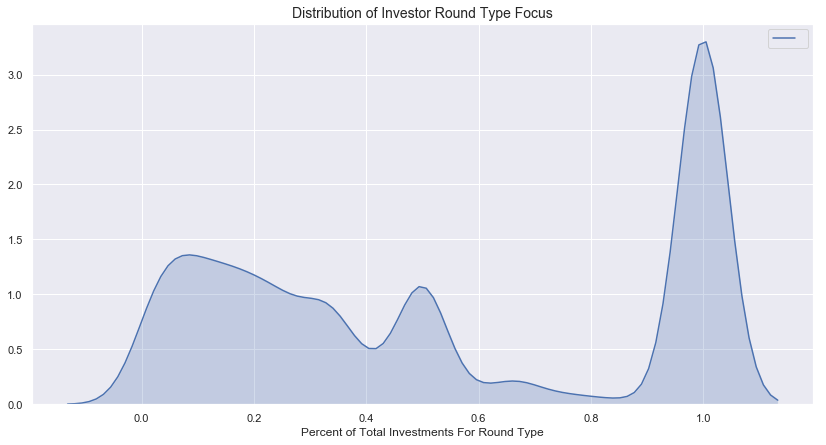

In [158]:
_ = plt.figure(figsize=(14,7))
_ = sns.kdeplot(investor_summary['investment_percentage'], shade=True)
_ = plt.title('Distribution of Investor Round Type Focus', size=14)
_ = plt.xlabel('Percent of Total Investments For Round Type')
_ = plt.legend([''])
_ = plt.savefig('figures/eda/investors/investor_round_type_focus_distribution.png')

### Observations:
- <strong>Investors whose investments are all in a single investment round type has a huge spike.</strong>
- This may be due to single investment investors so we will try to see the distribution without them.

## b) Overall Distribution Excluding Two Time Investors

In [112]:
# Only look at investors with more than two Investment
investors_experienced = investor_summary[investor_summary['total_investments'] > 2]

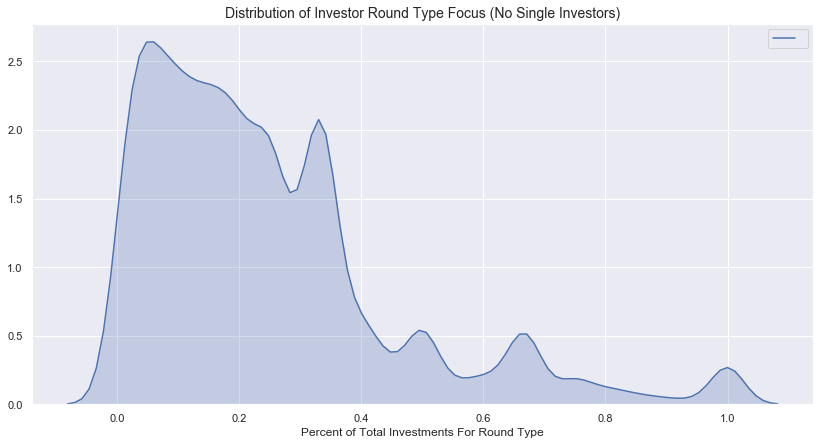

In [159]:
_ = plt.figure(figsize=(14,7))
_ = sns.kdeplot(investors_experienced['investment_percentage'], shade=True)
_ = plt.title('Distribution of Investor Round Type Focus (No Single Investors)', size=14)
_ = plt.xlabel('Percent of Total Investments For Round Type')
_ = plt.legend([''])
_ = plt.savefig('figures/eda/investors/investor_round_type_focus_distribution_no_single.png')

### Observations:
- <strong>Most investors fall into the 0 - 40% range</strong>
- <strong>By excluding 1 and 2 investment investors we got rid of many of the 50% and 100% Round Type Investors.</strong>

## c) Distribution By Venture Round

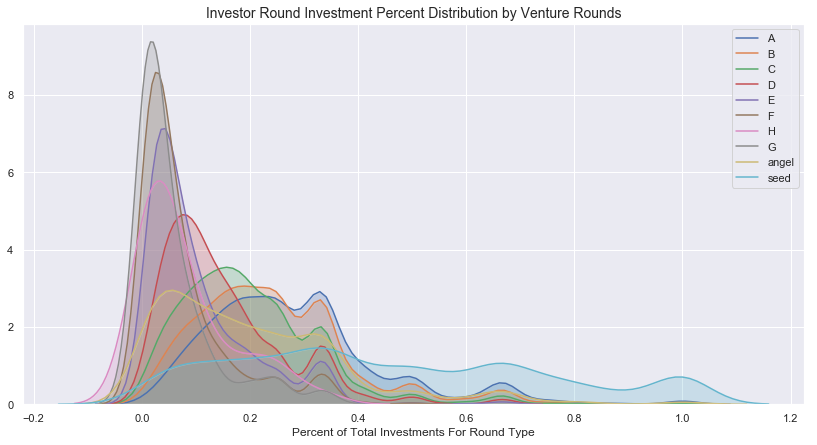

In [160]:
# Define Round Types to Focus on
round_cols = ['A', 'B', 'C', 'D', 'E', 'F', 'H', 'G', 'angel', 'seed']

# Plot
_ = plt.figure(figsize=(14,7))
for round_type in round_cols:
    _ = sns.kdeplot(investors_experienced[investors_experienced['round_type'] == round_type]['investment_percentage'], shade=True)
_ = plt.title('Investor Round Investment Percent Distribution by Venture Rounds', size=14)
_ = plt.xlabel('Percent of Total Investments For Round Type')
_ = plt.legend(round_cols)
_ = plt.savefig('figures/eda/investors/investor_venture_focus_distribution.png')

### Observations
- <strong>Most round types fall into the same distribution as the overall.</strong>
- <strong>Later Rounds have lower percent of total investments.</strong>
- Seed Round is the exception as <strong>seed investors tend to have a higher focus on Seeds</strong>

## d) Distribution By Other Round Types

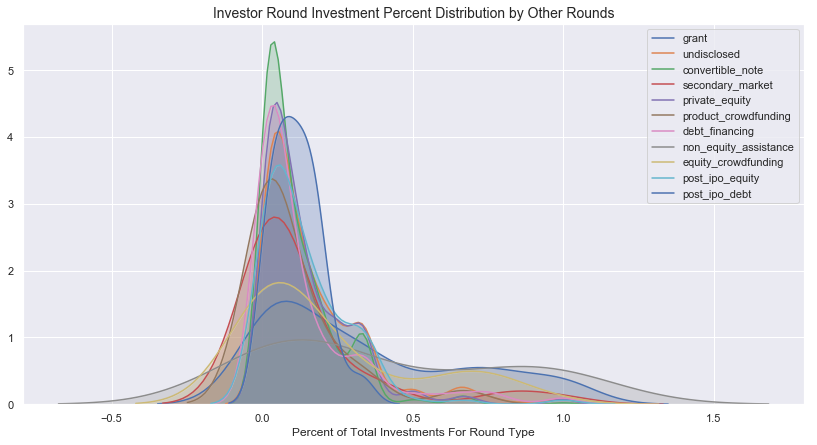

In [161]:
# Define Round Types to Focus on
other_round_cols = ['grant', 'undisclosed', 'convertible_note', 'secondary_market',\
                    'private_equity', 'product_crowdfunding', 'debt_financing',\
                    'non_equity_assistance', 'equity_crowdfunding', 'post_ipo_equity',\
                    'post_ipo_debt']
# Plot
_ = plt.figure(figsize=(14,7))
for round_type in other_round_cols:
    _ = sns.kdeplot(investors_experienced[investors_experienced['round_type'] == round_type]['investment_percentage'], shade=True)
_ = plt.title('Investor Round Investment Percent Distribution by Other Rounds', size=14)
_ = plt.xlabel('Percent of Total Investments For Round Type')
_ = plt.legend(other_round_cols)
_ = plt.savefig('figures/eda/investors/investor_other_rounds_focus_distribution.png')

### Observations
- <strong>Non-Equity Assistance and Grants tend to have higher focused funders</strong>
- <strong>Others tend to follow the same distribution as the overall.</strong>

# Final Observations:
### Q: Do Investors Tend To Focus on Different Round Types?

- <strong>From the distributions it seems most investors focus on a more than one round type.</strong>
- <strong>Most investors focus anywhere between 0 and 40% of their investments in a particular round type.</strong>
- This Excludes<strong> seed investors who have a higher distribution of their investments in seed investments.</strong>